In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import os
from scipy import stats
import math
from scipy.optimize import curve_fit
from scipy.stats import norm
import seaborn as sns
import pandas as pd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
'''Windowed mean square displacement'''
'''Input : dataFrame (num_robot x stored times), window size'''
'''Output : average wmsd for all the robot at each timestep'''
def window_displacement(df, window_size):
    # print(df.shape[1])
    w_displacement_matrix = np.array([])
    for f in range(window_size, df.shape[1]):
        xf = df[:,f]
        xi = df[:,f-window_size]
        sq_distance = np.sum((xf-xi)**2, axis=1)
        wmsd = np.true_divide(sq_distance, window_size**2)     #wmsd for the single robots
        w_displacement_matrix = np.column_stack([w_displacement_matrix, wmsd]) if w_displacement_matrix.size else wmsd
#         print(f-window_size, f)
    w_displacement_array = np.mean(w_displacement_matrix, axis=0)
    return(w_displacement_array)

In [4]:
'''Fixed window mean square displacement'''
'''Input : dataFrame (num_robot x stored times), window size'''
'''Output : average fixed wmsd for all the robot at each timestep'''
def fixed_window_displacement(df, window_size):
    w_displacement_matrix = np.array([])
    
    for f in range(window_size, df.shape[1], window_size):
        tf = df[:,f]
        ti = df[:,f-window_size]
        sq_distance = np.sum((tf-ti)**2, axis=1)
        wmsd = np.true_divide(sq_distance, window_size**2)
        w_displacement_matrix = np.column_stack([w_displacement_matrix, wmsd]) if w_displacement_matrix.size else wmsd
    #     print(f-w, f)

    w_displacement_array = np.mean(w_displacement_matrix, axis=0)
    return(w_displacement_array)
#     wmsd = np.mean(w_displacement_array)

In [5]:
def plot_heatmap(dictionary, w_size):
    for key, value in dictionary.items():
        fig=plt.figure(figsize = (12, 8))
        dataFrame=pd.DataFrame.from_dict(value)
        reversed_df=dataFrame.iloc[::-1]
        ax=sns.heatmap(reversed_df, annot = True, fmt = ".2e", vmin=0.0001, vmax=0.01)
        ax.set_title("Heatmap of WMSD for %s robots, w_size:%s" % (key, w_size))
        ax.set_ylabel("alpha")
        ax.set_xlabel("rho")
#         plt.show();
        #Salva su file
        file_name="WMSD_%s_robots_wsize_%s_heatmap.png" % (key, w_size)
        plt.savefig(results_dir+'/'+file_name)
        plt.close(fig)
    #     reversed_df.to_pickle(file_name[:-4] + ".pickle")

In [6]:
def plot_time_wmsd_temp(w_displacement_array, single_experiments, w_size, rho, alpha):
    times = np.arange(w_displacement_array.size)*10#*w_size scommentare solo per fixed wmsd
#     print("times.shape", times.shape)
#     print("single_experiments.shape", single_experiments.shape)
    fig=plt.figure(figsize=(20, 10), dpi= 160, facecolor='w', edgecolor='k')
#     for y in single_experiments:
#         plt.plot(times, y, "-o", linestyle='--')
    plt.plot(times, w_displacement_array, linewidth=3.0, marker='o')
    plt.title("WMSD in time, with " + r"$\bf{\rho}:$"+rho+" and " + r"$\bf{\alpha}:$"+alpha)
    plt.ylabel('w_displacement with window_size: %s' % w_size)
    plt.xlabel('time(s)')
    plt.ylim((0, 0.01))
    plt.grid()
#     plt.show();
    fileName = "wsize=%s_rho_%s_alpha_%s.png" %(w_size, rho, alpha)
    plt.savefig(result_time+'/'+fileName)
    plt.close(fig)

In [7]:
def plot_total_experiment_wmsd(total_wmsd_matrix, alpha, rho, w_size):
    fig=plt.figure(figsize=(20, 10), dpi= 160, facecolor='w', edgecolor='k')
    for i,y in enumerate(total_experiment_wmsd):
        print(len(y))
        if(windowed):
            times = np.arange(len(y))*10
        else:
            times = np.arange(len(y))*(i+1)*10
        
#         print("Times:", times)
#         print("WMSD:", y)
        plt.plot(times, y, label=i+1, marker='o')
#         print(i+1)
    plt.title("WMSD with different w_size, with " + r"$\bf{\rho}:$"+rho+" and " + r"$\bf{\alpha}:$"+alpha)
    plt.ylabel('WMSD')
    plt.xlabel('time(s)')
    plt.legend(loc='lower right')
    plt.xticks(np.arange(0, 900, 10))
    plt.grid(which='minor')
    plt.ylim((0,0.01))
    
    ax = plt.axes()
#     plt.setp(ax.get_xticklabels(),visible=False)
    # Make a plot with major ticks that are multiples of 20 and minor ticks that
    # are multiples of 5.  Label major ticks with '%d' formatting but don't label
    # minor ticks.
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%f'))
    
    
#     plt.show();
    fileName = "different_wSize_rho_%s_alpha_%s.png" %(rho, alpha)
    plt.savefig(result_time+'/'+fileName)
    plt.close(fig)
    
    
#     plt.setp(ax2.get_xticklabels(), visible=False)
#     frame1 = plt.gca()
#     frame1.axes.label.#().set_visible(False)

In [8]:
# def main():
windowed = True

from datetime import date
today = date.today()

'''Generate folder to store plots and heatmaps'''
script_dir = os.path.abspath('')
results_dir = os.path.join(script_dir, 'Plots/baseline_WMSD_'+str(today))


if (windowed):
    result_time = os.path.join(results_dir, 'moving_window')
else:
    result_time = os.path.join(results_dir, 'fixed_window')
    
if not os.path.isdir(results_dir):
    os.makedirs(results_dir)
if not os.path.isdir(result_time):
    os.makedirs(result_time)

# folder = "/home/luigi/Documents/scripts/test_scripts/results_2020-01-17"
# folder = "/home/luigi/Documents/scripts/test_scripts/results_baseline_single_robot"
folder = "/home/luigi/Documents/scripts/test_scripts/results_baseline_single_robot/2020-01-31_robots#1_alpha#1.2_rho#0.3_sim"
# folder = "/home/luigi/Documents/scripts/test_scripts/results_2020-01-17/2020-01-16_robots#50_alpha#1.2_rho#0.3_sim"


count = 1
# window_size = 2
# for window_size in range(1,10): #w_size (1...9)

total_dict=dict()
number_dict=dict()


for dirName, subdirList, fileList in os.walk(folder):
    num_robots = "0"
    rho = -1.0
    alpha = -1.0
    elements=dirName.split("_")
    for e in elements:
        if e.startswith("robots"):
            num_robots=e.split("#")[-1]
            if(num_robots not in total_dict):
                total_dict[num_robots]=dict()
                number_dict[num_robots]=dict()

        if(e.startswith("rho")):
            rho=float(e.split("#")[-1])
        if(e.startswith("alpha")):
            alpha=float(e.split("#")[-1])

#     print(str(count) + " : " + dirName)
    if(num_robots == "0" or rho == -1.0 or alpha == -1):
        continue
    rho_str=str(rho)
    alpha_str=str(alpha)
    # print("rho", rho_str)
    # print("alpha", alpha_str)
    if(rho_str not in total_dict[num_robots]):
        total_dict[num_robots][rho_str]=dict()
        number_dict[num_robots][rho_str]=dict()
#         print(total_dict)
    count +=1

    
    total_experiment_wmsd = []
    for window_size in range(1,2):#10):
        df = pd.DataFrame()
        number_of_experiments = 0
        single_experiments = np.array([])
        w_displacement_array = np.array([])
        
#         print("W_size=", window_size)
        for file in fileList:
            if file.endswith('position.tsv'):

    #             print(mean_wmsd)
    #             print('Directory %s' % dirName)
    #             print('\t\tfile %s' % file)
                number_of_experiments +=1
    #             print(dirName+"/"+file)
                df_single = pd.read_csv(dirName+"/"+file, sep="\t")
                df = df.append(df_single)

                df_values = df_single.values[:,1:]
                [num_robot, num_times] = df_values.shape
                df_values = np.array([x.split(',') for x in df_values.ravel()],dtype=float)
    #             print(df_values.shape)
                df_values = df_values.reshape(num_robot,num_times,2)
                if(windowed):
                    single_experiments = np.vstack([single_experiments,window_displacement(df_values, window_size)]) if single_experiments.size else window_displacement(df_values, window_size)
                else:
                    single_experiments = np.vstack([single_experiments,fixed_window_displacement(df_values, window_size)]) if single_experiments.size else fixed_window_displacement(df_values, window_size)


    #     print(single_experiments.shape)


    #     print(number_of_experiments)
        positions_concatenated = df.values[:,1:]
        [num_robot, num_times] = positions_concatenated.shape
        positions_concatenated = np.array([x.split(',') for x in positions_concatenated.ravel()],dtype=float)
        positions_concatenated = positions_concatenated.reshape(num_robot,num_times,2)

        if(windowed):
            win_disp = window_displacement(positions_concatenated, window_size)     
        else:
            win_disp = fixed_window_displacement(positions_concatenated, window_size)     
        w_displacement_array = np.vstack([w_displacement_array,win_disp]) if w_displacement_array.size else win_disp
        mean_wmsd = win_disp.mean()

        total_dict[num_robots][rho_str][alpha_str]=mean_wmsd
        number_dict[num_robots][rho_str][alpha_str]=number_of_experiments
#         total_experiment_wmsd = np.vstack([total_experiment_wmsd,w_displacement_array]) if total_experiment_wmsd.size else w_displacement_array
        total_experiment_wmsd.append(w_displacement_array)
    #     plot_time_wmsd_temp(w_displacement_array, single_experiments, window_size, rho_str, alpha_str)

    # plot_heatmap(total_dict, window_size)
    # print("w_displacement_array, with shape: ",w_displacement_array.shape)    
    # print(w_displacement_array)

    
    
#     plot_total_experiment_wmsd(total_experiment_wmsd, alpha_str, rho_str, window_size)

In [184]:
print(len(total_experiment_wmsd[0]))

89


In [26]:
from sklearn.linear_model import LinearRegression, BayesianRidge

x = np.arange(len(total_experiment_wmsd[0]))*10
y = np.asarray(total_experiment_wmsd).reshape(-1)

# reg = LinearRegression().fit(x,y)

In [31]:
X = x.reshape(-1,1)

In [32]:
clf = BayesianRidge()
clf.fit(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [22]:
mean_y = np.mean(y)
shifted_mean_y = np.mean(y[5:])
print(shifted_mean_y)
y_line = np.ones_like(x) * mean_y
shifted_y_line = np.ones_like(x) * shifted_mean_y

0.007084565416666666


In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x[5:], y[5:])

/home/luigi/.virtualenvs/argos/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


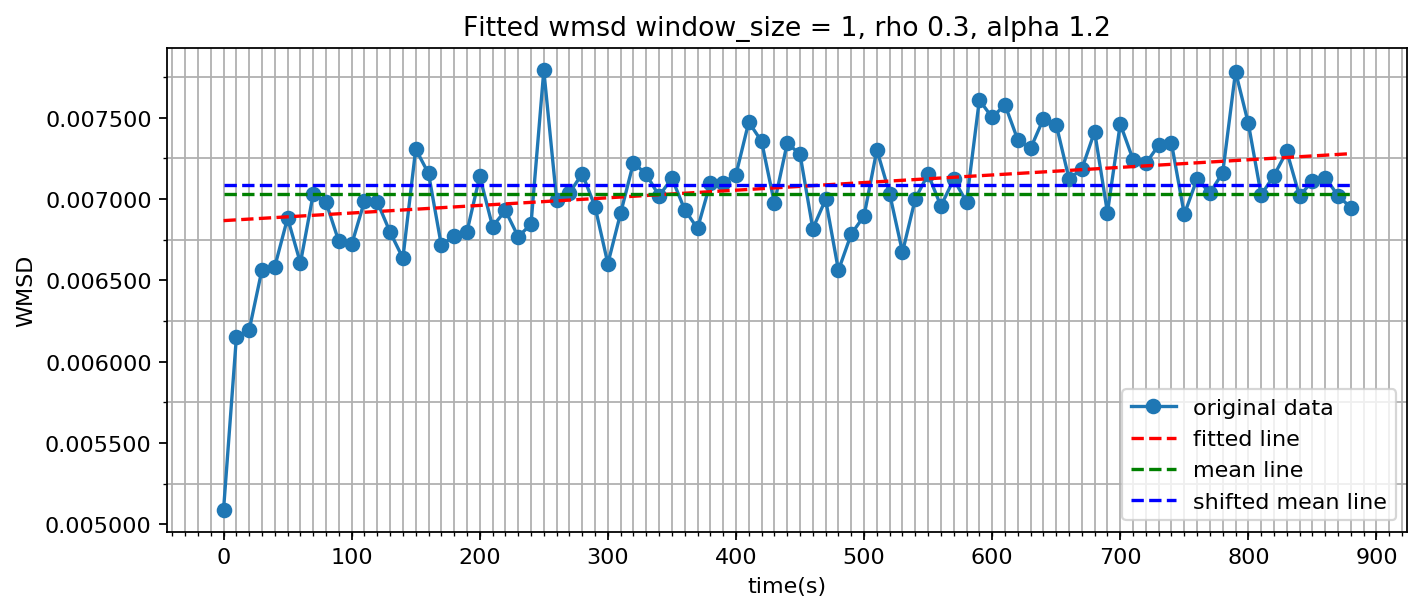

In [40]:
fig=plt.figure(figsize=(10, 4), dpi= 160, facecolor='w', edgecolor='k')

plt.plot(x, y, label='original data', marker='o')
plt.plot(x, intercept + slope*x, 'r', label='fitted line', linestyle='dashed')
plt.plot(x, y_line, 'g', label='mean line', linestyle='dashed')
plt.plot(x, shifted_y_line, 'blue', label='shifted mean line', linestyle='dashed')
fileName = "baseline_fit_w_1.png" 
plt.title("Fitted wmsd window_size = 1, rho 0.3, alpha 1.2")# + r"$\bf{\rho}:$"+rho+" and " + r"$\bf{\alpha}:$"+alpha)
plt.ylabel('WMSD')
plt.xlabel('time(s)')
plt.legend(loc='lower right')
plt.xticks(np.arange(0, 900, 10))
plt.grid(which='minor')
# plt.ylim((0.004,0.009))

ax = plt.axes()
#     plt.setp(ax.get_xticklabels(),visible=False)
# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%f'))


# plt.show();
# plt.savefig(results_dir+'/'+fileName)
# plt.close(fig)